In [1]:
import pandas as pd
import random
import numpy as np

In [2]:
#carregando base
dataset = pd.read_csv('./credit_data.csv')
dataset.shape

(2000, 5)

In [3]:
dataset.head()
#c#default = 0 pagou o emprestimo
#c#default = 1 não pagou o emprestimo

i#clientid        income        age         loan  c#default
0           1  66155.925095  59.017015  8106.532131          0
1           2  34415.153966  48.117153  6564.745018          0
2           3  57317.170063  63.108049  8020.953296          0
3           4  42709.534201  45.751972  6103.642260          0
4           5  66952.688845  18.584336  8770.099235          1

In [4]:
#apagando registros não completos (que falta algum dos atributos)
dataset.dropna(inplace=True)
dataset.shape

(1997, 5)

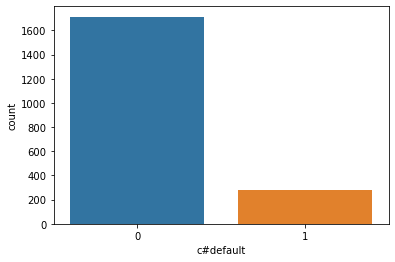

In [5]:
import seaborn as sns
sns.countplot( x = dataset['c#default']);
#base muito desbalanceada

In [6]:
#divisão de atributos
#Corta o id e o rotulo c#default
X = dataset.iloc[:,1:4].values
X.shape

(1997, 3)

In [7]:
#rótulos
y = dataset.iloc[:, 4].values
y.shape

(1997,)

In [8]:
from sklearn.model_selection import train_test_split
# 20% para teste e 80% para treinamneto
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, stratify =y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1597, 3), (1597,), (400, 3), (400,))

In [9]:
#base desbalanceada
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([1371,  226], dtype=int64))

In [10]:
#base desbalanceada
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([343,  57], dtype=int64))

In [11]:
#classificação naive bayes
from sklearn.naive_bayes import GaussianNB
#Criando o modelo
modelo = GaussianNB()
#treinando o modelo com a base desbalanceada
modelo.fit(X_train, y_train)

GaussianNB()

In [12]:
#Classificando o grupo de teste
previsoes = modelo.predict(X_test)

In [13]:
#Comparação com os rotulos corretos
from sklearn.metrics import accuracy_score
#calculando a acurácia
accuracy_score(previsoes,y_test)

0.91

In [14]:
from sklearn.metrics import confusion_matrix
#matrix de confusão
matrix = confusion_matrix(previsoes,y_test)
matrix

array([[332,  25],
       [ 11,  32]], dtype=int64)

<AxesSubplot:>

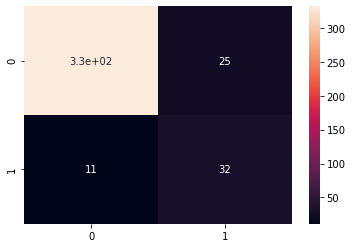

In [15]:
#visualização no seaborn
sns.heatmap(matrix, annot =True)

In [16]:
#Acerto por pessoas que pagam o emprestimo
matrix[0][0]/ (matrix[0][0] + matrix[0][1])


0.9299719887955182

In [17]:
#Acerto por pessoas que não pagam o emprestimo
accNaoPagantes = matrix[1][1]/ (matrix[1][1] + matrix[1][0])
accNaoPagantes


0.7441860465116279

In [18]:
#Caso utilizando o modelo atual
#Banco com 1000 clientes não pagadores
#Perdas por calote de 5000
clientes = 1000
perdas = 5000
naoPagadores = clientes*(1.0-accNaoPagantes)
print("Utilizando esse modelo, o banco vai ter "+str(naoPagadores)+" clientes não pagadores.")
print("Prejuízo de "+str(perdas*naoPagadores)+".")

Utilizando esse modelo, o banco vai ter 255.8139534883721 clientes não pagadores.
Prejuízo de 1279069.7674418606.


In [26]:
#Utilizando undersamples Tomek Links
#apaga registro da classe majoritaria
from imblearn.under_sampling import TomekLinks

In [33]:
tl = TomekLinks()
tl.return_indices=True
tl.ratio='majority'
X_under,y_under = tl.fit_sample(X,y)
X_under.shape,y_under.shape

((1897, 3), (1897,))

In [35]:
#comparação das bases depois dos cortes
np.unique(y, return_counts=True), np.unique(y_under, return_counts=True)

((array([0, 1], dtype=int64), array([1714,  283], dtype=int64)),
 (array([0, 1], dtype=int64), array([1614,  283], dtype=int64)))

In [38]:
X_train_u,X_test_u,y_train_u,y_test_u = train_test_split(X_under,y_under,test_size=0.2,stratify=y_under)
X_train_u.shape,X_test_u.shape,y_train_u.shape,y_test_u.shape

((1517, 3), (380, 3), (1517,), (380,))

In [40]:
#criação do modelos undersamples
modelo_u= GaussianNB()
#treinamento
modelo_u.fit(X_train_u,y_train_u)
previsoes_u = modelo_u.predict(X_test_u)
#acc geral
accuracy_score(previsoes_u,y_test_u)

0.9210526315789473

In [41]:
matrix_u = confusion_matrix(previsoes_u, y_test_u)
matrix_u

array([[317,  24],
       [  6,  33]], dtype=int64)

<AxesSubplot:>

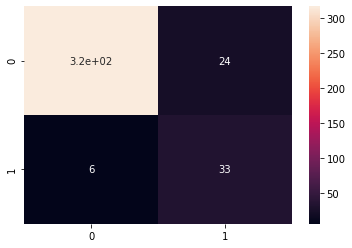

In [42]:
sns.heatmap(matrix_u, annot =True)

In [43]:
#Acerto por pessoas que pagam o emprestimo
matrix_u[0][0]/ (matrix_u[0][0] + matrix_u[0][1])

0.9296187683284457

In [44]:
#Acerto por pessoas que não pagam o emprestimo
accNaoPagantes_u = matrix_u[1][1]/ (matrix_u[1][1] + matrix_u[1][0])
accNaoPagantes_u

0.8461538461538461

In [45]:
#Caso utilizando o modelo atual
#Banco com 1000 clientes não pagadores
#Perdas por calote de 5000
naoPagadores_u = clientes*(1.0-accNaoPagantes_u)
print("Utilizando esse modelo, o banco vai ter "+str(naoPagadores_u)+" clientes não pagadores.")
print("Prejuízo de "+str(perdas*naoPagadores_u)+".")

Utilizando esse modelo, o banco vai ter 153.84615384615387 clientes não pagadores.
Prejuízo de 769230.7692307694.


In [51]:
#Utilizando sobreamostragem com SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
smote.ratio='minority'
X_over,y_over = smote.fit_sample(X,y)
X_over.shape,y_over.shape

((3428, 3), (3428,))

In [53]:
#comprando a base original e a base oversampling
np.unique(y, return_counts=True), np.unique(y_over, return_counts=True)

((array([0, 1], dtype=int64), array([1714,  283], dtype=int64)),
 (array([0, 1], dtype=int64), array([1714, 1714], dtype=int64)))

In [55]:
#obs: modificar para não usar dados criados nos testes
X_train_o,X_test_o,y_train_o,y_test_o = train_test_split(X_over,y_over,test_size=0.2,stratify=y_over)
X_train_o.shape,X_test_o.shape,y_train_o.shape,y_test_o.shape

((2742, 3), (686, 3), (2742,), (686,))

In [56]:
#criação do modelos oversamples
modelo_o= GaussianNB()
#treinamento
modelo_o.fit(X_train_o,y_train_o)
previsoes_o = modelo_o.predict(X_test_o)
#acc geral
accuracy_score(previsoes_o,y_test_o)

0.9358600583090378

In [57]:
matrix_o = confusion_matrix(previsoes_o, y_test_o)
matrix_o

array([[310,  11],
       [ 33, 332]], dtype=int64)

<AxesSubplot:>

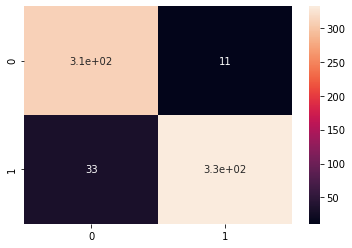

In [58]:
sns.heatmap(matrix_o, annot =True)

In [59]:
#Acerto por pessoas que pagam o emprestimo
matrix_o[0][0]/ (matrix_o[0][0] + matrix_o[0][1])

0.9657320872274143

In [60]:
#Acerto por pessoas que não pagam o emprestimo
accNaoPagantes_o = matrix_o[1][1]/ (matrix_o[1][1] + matrix_o[1][0])
accNaoPagantes_o

0.9095890410958904

In [61]:
#Caso utilizando o modelo atual
#Banco com 1000 clientes não pagadores
#Perdas por calote de 5000
naoPagadores_o = clientes*(1.0-accNaoPagantes_o)
print("Utilizando esse modelo, o banco vai ter "+str(naoPagadores_o)+" clientes não pagadores.")
print("Prejuízo de "+str(perdas*naoPagadores_o)+".")

Utilizando esse modelo, o banco vai ter 90.41095890410955 clientes não pagadores.
Prejuízo de 452054.79452054773.


In [66]:
print("Prejuizo sem balanceamento de base é aproximadamente: "+str(int(perdas*naoPagadores)))
print("Prejuizo com undersampling de base é aproximadamente: "+str(int(perdas*naoPagadores_u)))
print("Prejuizo com oversampling de base é aproximadamente: "+str(int(perdas*naoPagadores_o)))

Prejuizo sem balanceamento de base é aproximadamente: 1279069
Prejuizo com undersampling de base é aproximadamente: 769230
Prejuizo com oversampling de base é aproximadamente: 452054
